In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('gym_members_exercise_tracking.csv')

In [3]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [4]:
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [5]:
df.groupby(['Gender']).size()


Gender
Female    462
Male      511
dtype: int64

In [6]:
df_male = df[df['Gender'] != 'Female']

In [7]:
df_female=df[df['Gender']=='Female']

In [8]:
workout=df.groupby(['Workout_Type','Gender']).size()
workout.index

MultiIndex([(  'Cardio', 'Female'),
            (  'Cardio',   'Male'),
            (    'HIIT', 'Female'),
            (    'HIIT',   'Male'),
            ('Strength', 'Female'),
            ('Strength',   'Male'),
            (    'Yoga', 'Female'),
            (    'Yoga',   'Male')],
           names=['Workout_Type', 'Gender'])

([<matplotlib.patches.Wedge at 0x2111064ee40>,
 [Text(1.0102199936336014, 0.43526493594468024, "('Cardio', 'Female')"),
  Text(0.36749445740115205, 1.0367969057532112, "('Cardio', 'Male')"),
  Text(-0.44989643629551485, 1.0037894184581724, "('HIIT', 'Female')"),
  Text(-0.9971469307238839, 0.4644329860678913, "('HIIT', 'Male')"),
  Text(-1.0408835778186274, -0.35575465903835163, "('Strength', 'Female')"),
  Text(-0.4368953206711429, -1.0095159626155792, "('Strength', 'Male')"),
  Text(0.39746318769237077, -1.0256817315470814, "('Yoga', 'Female')"),
  Text(1.0001251992989058, -0.45798426362411626, "('Yoga', 'Male')")],
 [Text(0.5510290874365098, 0.23741723778800738, '12.95%'),
  Text(0.2004515222188102, 0.5655255849562969, '13.26%'),
  Text(-0.2453980561611899, 0.5475215009771849, '11.00%'),
  Text(-0.5438983258493911, 0.2533270833097589, '11.72%'),
  Text(-0.5677546788101603, -0.19404799583910087, '12.64%'),
  Text(-0.2383065385478961, -0.5506450705175886, '13.87%'),
  Text(0.216798102

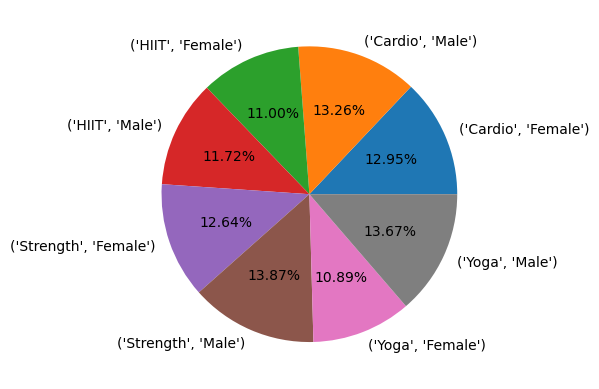

In [9]:
plt.pie(workout.values,labels=workout.index,autopct='%1.2f%%')

Observation: 
Nearly 52 percent of people either have cardio or strength as their workout routine

In [11]:
df.groupby(['Workout_Type']).size()

Workout_Type
Cardio      255
HIIT        221
Strength    258
Yoga        239
dtype: int64

In [12]:
c1=df[df['Workout_Type'] == 'HIIT']['Calories_Burned'].mean()
d1=df[df['Workout_Type'] == 'HIIT']['Session_Duration (hours)'].mean()
c1/d1

719.3186612290815

In [13]:
c2=df[df['Workout_Type'] == 'Yoga']['Calories_Burned'].mean()
d2=df[df['Workout_Type'] == 'Yoga']['Session_Duration (hours)'].mean()
c2/d2

715.2011132463057

In [14]:
c3=df[df['Workout_Type'] == 'Strength']['Calories_Burned'].mean()
d3=df[df['Workout_Type'] == 'Strength']['Session_Duration (hours)'].mean()
c3/d3

722.6870078740156

In [15]:
c4=df[df['Workout_Type'] == 'Cardio']['Calories_Burned'].mean()
d4=df[df['Workout_Type'] == 'Cardio']['Session_Duration (hours)'].mean()
c4/d4

724.964643867318

Observation:
1. Cardio workout burns relatively more calories/hour followed by
2. Strength
3. HIIT
4. Yoga
   

In [17]:
df['Age'].max()

59

In [18]:
df['Age'].min()

18

In [19]:
df_bmi=pd.read_excel('BMI_classification.xlsx')
df_bmi

,BMI,Classification
0,<18.5,Underweight
1,18.5-25,Normal Weight
2,25-30,Overweight
3,>30,Obese


In [20]:
a=df[df['BMI'].values<18.5].BMI.size
b=df[(df['BMI'].values < 25) & (df['BMI'].values > 18.5)].BMI.size
c=df[(df['BMI'].values < 30) & (df['BMI'].values > 25)].BMI.size
d=df[(df['BMI'].values >30) ].BMI.size

In [21]:
bmi_class=pd.Series([a,b,c,d],index=['Underweight','Normal Weight','Over Weight','Obese'])

([<matplotlib.patches.Wedge at 0x21110683d40>,
 [Text(0.9421006259932772, 0.5678436496986433, 'Underweight'),
  Text(-0.7159444894154414, 0.8351188466773235, 'Normal Weight'),
  Text(-0.48206646449637797, -0.9887425973467324, 'Over Weight'),
  Text(0.895314986374761, -0.6390704774692394, 'Obese')],
 [Text(0.5138730687236056, 0.30973289983562363, '17.27%'),
  Text(-0.3905151760447862, 0.4555193709149037, '38.03%'),
  Text(-0.26294534427075156, -0.5393141440073085, '24.97%'),
  Text(0.48835362893168777, -0.3485838968014033, '19.73%')])

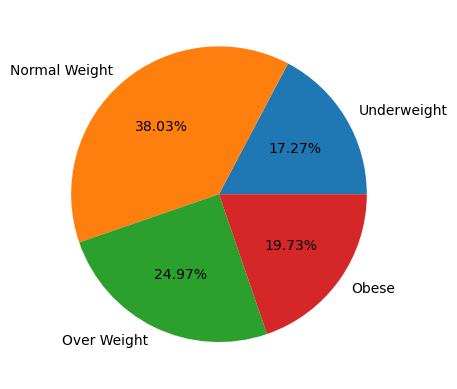

In [22]:
plt.pie(bmi_class,labels=bmi_class.index,autopct='%1.2f%%')

Observation:
1. Around 370 members have normal weight
2. 243 members are overweight
3. 192 members are obese
4. 168 members are underweight

(array([197.,   0.,   0., 368.,   0.,   0., 306.,   0.,   0., 102.]),
 array([2. , 2.3, 2.6, 2.9, 3.2, 3.5, 3.8, 4.1, 4.4, 4.7, 5. ]),
 <BarContainer object of 10 artists>)

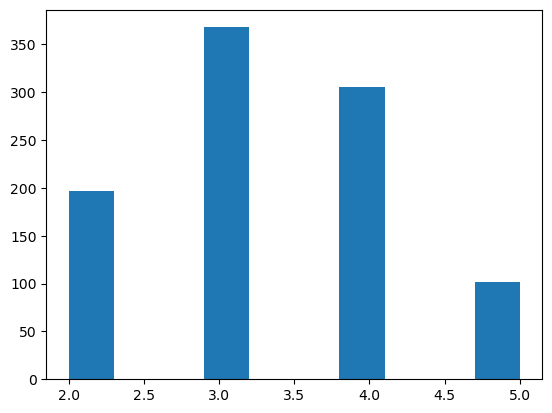

In [24]:
plt.hist(x='Workout_Frequency (days/week)',data=df)

Observation:
1. Maximum number of the people workout 3 days a week
2. Relatively very few members workout 5 days a week

In [49]:
df[df['Water_Intake (liters)'].values < 2].Gender.value_counts()

Gender
Female    138
Name: count, dtype: int64

#Observation
Around 138 people particularly women consume less than 2 litres of water per day which is less than the minimum amount of water intake per day

In [85]:
df['Calories_Burned'].corr(df['Workout_Frequency (days/week)'])

0.5761501254548647

In [97]:
df.groupby('Workout_Frequency (days/week)')[['Calories_Burned', 'Fat_Percentage']].mean()

,Calories_Burned,Fat_Percentage
Workout_Frequency (days/week),,
2,726.380711,27.439594
3,821.437500,27.586413
4,997.640523,23.693137
5,1277.568627,14.655882


Observation:
People working out 5 days a week have minimum body fat